In [1]:
!pip3 install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#import libarary
import pandas as pd
import numpy as np
import html 
import re
import warnings 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn_extra.cluster import KMedoids
#Step3 and Step4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #for vectorize text into sparse matrix 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from io import StringIO
from sklearn.model_selection import cross_val_score
from IPython.display import display
import itertools

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#load the data
df=pd.read_csv("C:/Users/eBdesk/Desktop/SupervisorConf/media/dataTraining3/3rd/final/data.csv")

In [5]:
df

,sumber,link,created_at,category,content
0,tempo.co,http://bisnis.tempo.co/read/1415614/meski-dipr...,2020-12-18 05:50:28,business and economy,Menjelang hari raya Natal dan Tahun Baru 2021 ...
1,medcom.id,https://video.medcom.id/video-advertorial/GKdp...,2020-12-18 05:05:51,business and economy,Indonesia merupakan negara kepulauan dengan le...
2,tribun news,https://www.tribunnews.com/bisnis/2020/12/18/l...,2020-12-18 05:22:13,business and economy,Simak langkah melakukan klaim token listrik gr...
3,wartakotalive,https://wartakota.tribunnews.com/2020/12/18/up...,2020-12-18 03:15:24,business and economy,-- Berikut ini update harga emas hari ini seba...
4,medcom.id,https://www.medcom.id/ekonomi/global/zNA3p8nk-...,2020-12-18 05:21:28,business and economy,Federal Reserve memutuskan untuk sedikit menai...
...,...,...,...,...,...
5190,tribun news,https://www.tribunnews.com/superskor/2020/12/0...,2020-11-30 22:48:36,sports,Media Spanyol AS mengklaim Chelsea menjadi klu...
5191,suara.com,https://sumut.suara.com/read/2020/12/01/060000...,2020-11-30 23:06:51,sports,Manchester United melakoni comeback fenomenal ...
5192,republika,https://republika.co.id/berita/qkmtj0313/onepr...,2020-11-30 23:10:04,sports,Ajang beladiri Mixed Martial Arts terbesar di ...
5193,republika,https://republika.co.id/berita/qkmtoe313/sirku...,2020-11-30 23:10:04,sports,Sirkuit Mandalika Indonesia resmi masuk dalam ...


In [6]:
katagori = df['category'].value_counts()
katagori

sports                    541
law and crimes            538
business and economy      534
health and medicine       525
politics and election     522
entertainment             517
science and technology    509
lifestyle                 506
education                 503
disaster and accident     500
Name: category, dtype: int64

In [7]:
nanvaluekategori = df['category'].isnull().sum()
nanvaluecontent = df['content'].isnull().sum()
nanvaluekategori,nanvaluecontent

(0, 0)

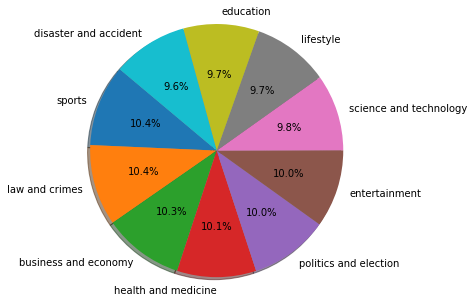

In [8]:
#(menampilkan jumlah data dlm grafik)
plt.figure(figsize=(5,5))
labels = katagori.index.tolist()
sizes = katagori
explode = (0,0,0,0,0,0,0,0,0,0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
NewsData = df.drop(columns=['sumber', 'link','created_at'])
NewsData

,category,content
0,business and economy,Menjelang hari raya Natal dan Tahun Baru 2021 ...
1,business and economy,Indonesia merupakan negara kepulauan dengan le...
2,business and economy,Simak langkah melakukan klaim token listrik gr...
3,business and economy,-- Berikut ini update harga emas hari ini seba...
4,business and economy,Federal Reserve memutuskan untuk sedikit menai...
...,...,...
5190,sports,Media Spanyol AS mengklaim Chelsea menjadi klu...
5191,sports,Manchester United melakoni comeback fenomenal ...
5192,sports,Ajang beladiri Mixed Martial Arts terbesar di ...
5193,sports,Sirkuit Mandalika Indonesia resmi masuk dalam ...


In [10]:
NewsData['content'] = NewsData['content'].str.lower()
NewsData

,category,content
0,business and economy,menjelang hari raya natal dan tahun baru 2021 ...
1,business and economy,indonesia merupakan negara kepulauan dengan le...
2,business and economy,simak langkah melakukan klaim token listrik gr...
3,business and economy,-- berikut ini update harga emas hari ini seba...
4,business and economy,federal reserve memutuskan untuk sedikit menai...
...,...,...
5190,sports,media spanyol as mengklaim chelsea menjadi klu...
5191,sports,manchester united melakoni comeback fenomenal ...
5192,sports,ajang beladiri mixed martial arts terbesar di ...
5193,sports,sirkuit mandalika indonesia resmi masuk dalam ...


In [11]:
# untuk menghapus apapun selain text 
NewsData['content']=NewsData['content'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
#step tokenize
NewsData['content'] = NewsData['content'].apply(nltk.word_tokenize)
NewsData

,category,content
0,business and economy,"[menjelang, hari, raya, natal, dan, tahun, bar..."
1,business and economy,"[indonesia, merupakan, negara, kepulauan, deng..."
2,business and economy,"[simak, langkah, melakukan, klaim, token, list..."
3,business and economy,"[berikut, ini, update, harga, emas, hari, ini,..."
4,business and economy,"[federal, reserve, memutuskan, untuk, sedikit,..."
...,...,...
5190,sports,"[media, spanyol, as, mengklaim, chelsea, menja..."
5191,sports,"[manchester, united, melakoni, comeback, fenom..."
5192,sports,"[ajang, beladiri, mixed, martial, arts, terbes..."
5193,sports,"[sirkuit, mandalika, indonesia, resmi, masuk, ..."


In [12]:
data = pd.read_csv("C:\\Users\\eBdesk\\Documents\\Untitled Folder\\indonesian_stopword.txt")
data['\'\'']
NewsData['content'] = NewsData['content'].apply(lambda x: [y for y in x if y not in data['\'\''].tolist()])
stopword = NewsData
stopword

,category,content
0,business and economy,"[menjelang, raya, natal, pt, pertamina, perser..."
1,business and economy,"[indonesia, negara, kepulauan, pulau, geografi..."
2,business and economy,"[simak, langkah, klaim, token, listrik, gratis..."
3,business and economy,"[update, harga, emas, panduan, harga, jual, em..."
4,business and economy,"[federal, reserve, memutuskan, menaikkan, perk..."
...,...,...
5190,sports,"[media, spanyol, as, mengklaim, chelsea, klub,..."
5191,sports,"[manchester, united, melakoni, comeback, fenom..."
5192,sports,"[ajang, beladiri, mixed, martial, arts, terbes..."
5193,sports,"[sirkuit, mandalika, indonesia, resmi, masuk, ..."


In [13]:
#untuk mengubah field category menjadi angka untuk mempercepat proses
NewsData2 = sorted(NewsData['category'].unique())
NewsData_mapping = dict(zip(NewsData2, range(0, len(NewsData2) + 1)))
NewsData['category']  = NewsData['category'].map(NewsData_mapping).astype(int)
NewsData_mapping = NewsData
NewsData_mapping

,category,content
0,0,"[menjelang, raya, natal, pt, pertamina, perser..."
1,0,"[indonesia, negara, kepulauan, pulau, geografi..."
2,0,"[simak, langkah, klaim, token, listrik, gratis..."
3,0,"[update, harga, emas, panduan, harga, jual, em..."
4,0,"[federal, reserve, memutuskan, menaikkan, perk..."
...,...,...
5190,9,"[media, spanyol, as, mengklaim, chelsea, klub,..."
5191,9,"[manchester, united, melakoni, comeback, fenom..."
5192,9,"[ajang, beladiri, mixed, martial, arts, terbes..."
5193,9,"[sirkuit, mandalika, indonesia, resmi, masuk, ..."


In [14]:
NewsData2

['business and economy',
 'disaster and accident',
 'education',
 'entertainment',
 'health and medicine',
 'law and crimes',
 'lifestyle',
 'politics and election',
 'science and technology',
 'sports']

In [15]:
NewsData['content'] = NewsData['content'].str.join(" ")
NewsData.head()

,category,content
0,0,menjelang raya natal pt pertamina persero meng...
1,0,indonesia negara kepulauan pulau geografis ind...
2,0,simak langkah klaim token listrik gratis disko...
3,0,update harga emas panduan harga jual emas mamp...
4,0,federal reserve memutuskan menaikkan perkiraan...


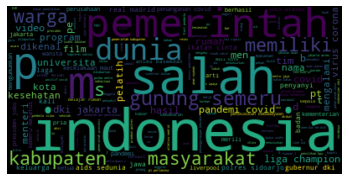

In [16]:
#wordcloud untuk mengetahui text apa saja yang sering keluar
text = NewsData['content'].to_string()
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemming process
i=0
stm = NewsData
stm_tfidf=NewsData
NewsData
import array

In [18]:
from tqdm.notebook import tqdm as tqdm
i=0
list1 = []
for index,row in tqdm(stm.iterrows()):
  i=i+1
  res= stemmer.stem(row['content'])
  list1.append(res)
stm_tfidf['content']=list1

In [19]:
import array
for index,row in stm_tfidf.iterrows():
  print(row['content'])

jelang raya natal pt pertamina persero aktif satu tugas semenjak tanggal pekan tanggal wilayah jawa pertamina prediksi tingkat konsumsi bahan bakar pesawat udara avtur jelang periode ratarata hari kiloliter kl kl tanggung unit manager communication relations csr pertamina regional jawa arya yusa dwicandra ratarata normal pandemi covid kl catat turun tinggi bandar udara yogyakarta international airport yia adi sutjipto mana salur total pandemi covid angka kl satgas kali prediksi angka kl normal arya terang tulis bandar udara ahmad yani kota semarang adi soemarmo boyolali normal salur bandara ahmad yani normal kl prediksi kisar angka kl natal normal adi soemarmo satgas prediksi salur kl rata hari normal pandemi kl arya stok avtur mana coverage days tahan stok wilayah jawa pandemi covid pertamina milik stok bahan bakar pesawat khawatir tumpang maskapai sedia bahan bakar
indonesia negara pulau pulau geografis indonesia milik tantang bangun sosialekonomi rata kemenkominfo sedia layan teleko

pt waskita karya persero tbk kode saham wskt transformasi digital dukung era bisnis industri adaptasi new normal transformasi luncur digital twin integrasi teknologi bim sistem informasi geospasial digital twin kembar digital representasi konstruksi bangun waskita karya tuju simulasi skenario informasi aktual lapang optimalisasi ambil putus visi transformasi digital manajemen waskita manfaat teknologi digital twin geospasial inovasi nyata maju bumn era digital rencana ekspansi bisnis inisiasi kembang operasi bas big data teknologi waskita harap cepat pulih ekonomi nasional director of human capital management system development pt waskita karya persero tbk hadjar seti adji program integrasi gis rangkai proses transformasi digital hasil kerjasama waskita esri indonesia sedia solusi geospasial besar tanah air transformasi digital waskita karya awal implementasi lini usaha kontruksi jalan tol dukung program perintah pulih ekonomi nasional cepat bangun infrastruktur sukses transformasi dig

rumah panggarangan kabupaten lebak provinsi banten roboh landa longsor guyur hujan intensitas jam untung longsor timbul bencana alam tinggi meter kepala badan tanggulang bencana daerah bpbd provinsi banten nana suryana posko darurat mitigasi villa hejo kiara payung panggarangan lebak bpbd provinsi banten langsung evakuasi warga antisipasi bencana alam curah hujan daerah intensitas lebat masyarakat rumah longsor tinggal rumah kerabat hubung cuaca buruk pek potensi bencana alam warga ungsi kurang risiko bencana timbul korban jiwa bpbd banten imbau masyarakat waspada hujan malam khawatir timbul banjir longsor warga kabupaten lebak tinggal daerah rawan bencana alam capai ribu kepala keluarga kawasan kaki gunung halimunsalak ingat waspada hadap cuaca buruk kepala desa panggarangan buharta empat rumah bawa longsor milik ema adnah jupron usin madsari kondisi rumah centimeter lokasi risiko longsor meter lokasi bukit longsor bahaya selamat jiwa
polisi selidik sebab tabrak untun daerah tanjungsa

kapolres kombes budi sartono tugas lidi kait insiden bakar spbu jalan mt haryono jakarta siang budi dasar hasil lidi akibat percik api muncul madam listrik pagi spbu mobil tangki spub isi spbunya mati lampu nyala lampu isi bensin percik bakar akibat pompa bakar mobil tangki spub lokasi insiden kali akibat mobil tangki bakar aman tugas langsung padam pakai alat madam spbu kondisi ibi api padam mobil damkar tkp tindak polres metro jaksa laksana police line terang saksi saksi tunggu puslabfor sebab bakar budi insiden bakar timbul ledak bakar pompa isi bensin bakar pompa alat isi spuv mobil mobil tangki bakar pompa alat isi mobil tangki korban jiwa budi sebut korban jiwa insiden bakar kali sopir alami luka ringan akibat loncat mobil bakar korban jiwa sopir jatuh mobil pas bakar loncat mobil lecet kaki terang
mobil tangki bahan bakar minyak bbm bakar stasiun isi bahan bakar spbu mt haryono cikoko pancoran jakarta siang sang sopir selamat loncat mobil korban jiwa sopir jatuh mobil pas bakar 

program ajar rumah tvri diposting akun instagram kemdikbudri jadwal ajar rumah program ajar rumah pasuk pekan ajar tayang tvri pandu pandemi program ajar rumah pekan pandemi covid pasuk empat program ajar rumah liput tayang anak usia paud derajat sd derajat smp derajat smasmk derajat dengar papar materi siswa sd smp sma lengkap jadwal tvri materi ajar rumah tvri pekan lansir buku cerita senandung anak nusantara kidi widi musik magi nusa klub rumah pohon branda rt ajar iman takwa akhlak wayang film talkshow asli indonesia jamu nusantara geliat wellness bas tradisi gema rempah arka kari pandu orangtua murid rumah awas anakanaknya ikut saksi tayang program ajar rumah tvri pandu anak simak tayang tampil simak tayang anak tua harap paham materi perhati anak paham tugas tayang pandu anak tugas diskus guru anak butuh bimbing vidio klik link metube klik link tvri klik link useetv klik link tvri klik link tv klik link judul jadwal ajar rumah tvri sd kelas kelas smp sma
menteri didik budaya kemd

jurus kuliah langkah jurusanjurusan kuliah mudah kerja masuk kuliah jurus utama timbang tentu jurus kuliah sesuai minat bakat milik prospek kali timbang utama tentu jurus kuliah jurus favorit incar anggap butuh dunia kerja paham minat sutu jurus saing saing masuk kuliah cari kerja bidang kait jurusanjurusan populer jurus langka jurusanjurusan jarang sedia guru jarang jurusanjurusan langka milik prospek gemilang lantas jurus saja bicara jurus astronomi pasti pikir besit astronom jurus mahasiswa ajar ilmu tata surya fisika bintang galaksi kosmologi gali ilmu dunia observasi bendabenda langit indonesia jurus institut teknologi bandung itb lulus jurus astronomer ahli butuh lembagalembaga antariksa teliti indonesia takut jurus nama salah ilmu mahasiswa dapat ambil jurus teknik nuklir ilmu prospek karir kerja dapat ragu jurus buka siswa dalam fenomena reaksi tenaga nuklir maju zaman jurus butuh lembaga individu dunia sehat industri dunia tahu indonesia jurus buka guru negeri ptn muka univers

status kota tasikmalaya zona merah risiko papar covid salah satu sebab muncul klaster komplek didik agama dominasi klaster didik agama covid ledak jadi kota tasikmalaya status zona merah kepala dinas sehat kota tasikmalaya uus supangat klaster didik agama dominasi warga kota tasikmalaya waspada klaster keluarga duduk posisi khawatir dominasi klaster keluarga duduk urut klaster didik agama uus klaster bugar klaster kantor perintah klaster kantor swasta klaster keluarga sifat impor asal daerah transmisi lokal uus papar covid anggota keluarga waspada warga sifat sebar golong cepat anggota keluarga kerap kontak erat uus kendur protokol sehat jaga jarak pakai masker cuci tangan pakai sabun
desiminasi teknologi mobile application matrash inovasi kelola sampah pesisir desa jenu kabupaten tuban jawa jatim giat laksana tim dosen universitas akademi manajemen informatika komputer amikom yogyakarta giat tuai dosen prodi sarjana kewirausahaan suyatmi anggota dosen prodi geografi khusnawi dosen pro

jelang terap ajar tatap muka bunda paud kumpul wakil siswa guru kabupaten gianyar pola ajar tatap muka ikut protokol sehat ketat jelang terap ajar tatap muka jadwal khusus perwakiilan siswa gianyar bekal buku alat ajar penting ajar tatap muka jalan protokol sehat ketat dayu surya adnyani mahayastra bunda paud gianyar pesan protokol sehat siswa guruguru dar terap m jaga jarak pakai masker cuci tangan sekolah cuci tangan atur duduk siswa awas tenaga didik bijak ajar tatap muka rencana laku semua sekolah gianyar pola puluh siswa ikut ajar tatap muka daring
komisi independen pilih kip aceh tanda tangan nota paham mou kait sharing knowledge sekolah ilmu sosial ilmu politik stisip al washliyah kampus jalan al washliyah lam ararukoh camat syiah kuala banda aceh mou langsung teken ketua kip aceh muhammad hayat ketua stisip al washliyah banda aceh dr dicky wirianto ma kerjasama harap transfer ilmu bidang milu kip aceh stisip al washliyahujar ketua kip aceh muhammad hayat sekretaris fahmi sip mi

keluarga dangdut ayu ting ting keliling haters apa laku unggah media sosial ayu ting ting hujat cacimaki haters warganet benci ayu ting ting kerap tulis komentar negatif ayu ting ting artis milik haters ayu ting ting benar baca komentar negatif warganet akun media sosial haters banget nyinyir ayu ting ting kanal youtube rio motret kutip warta kota janda anak pilih pikir komentar miring hatersnya media sosial hidup tenang anggap pahala nggak ketemu jahat ya ayu ting ting sebut haters gemar haters follower akun media sosial ayu ting ting pakai sendal jepit aja dikatain nggak cinta nggak peduli ayu ting ting untung ayu ting ting jarang baca komentar pedas haters kecuali follow komentar ayu ting ting
nama arya saloka daun pasal peran epik sinetron ikat cinta rcti bareng amanda manopo apa per aldebaran al tarik perhati masyarakat istri putri anne anak ibrahim jalal pasang kenal sinetron bintang putri anne kenal istri mas pur tukang ojek pengkol arya saloka putri anne meni nikah kah anak lak

nama choky andriano akrab kalang cinta serial kolosal aktor laga kenal karya genta buana milik buah hati adrienne zee si putri sulung anjak remaja pesona yuk tengok profil anak choky andriano sangka kasih wajah awet muda choky andriano ayah anak putri sulung adrienne zee abg gak pesona anjak remaja usia adrienne salah siswi bus school bekas cewek kenal nama jasmine tumbuh gadis cantik pesona sang ayah adrienne kasih choky andriano lokasi syuting sangka adrienne buah hati choky yup cewek manis ikut jejak choky andriano bidang akting sinetron laga adrienne zee adu akting alwi assegaf sinetron kembali raden kian santang peran nyimas sekar arum bekas gemar rindu tampil layar kaca sukses adrienne zee moga prestasi tunggu proyek akting fakta adrienne zee putri cantik choky andriano anjak remaja cantik pesona sukses pukau gemar sukses ya adrienne
tahun surat kabar bisnis money today bas korea ada asia artist awards kenal aaa pandemi covid tapui halang asia artist awards asia artist awards hel

pandemi virus corona landa indonesia kendali kian tingkat capai rekor alhasil covid angsur rombak rugi pelbagai sektor sehat saksi live streaming programprogram cnbc indonesia tv
tikus rumah hewan erat seringkali ganggu nyaman huni rumah tikus kerap curi makan rusak perabot acau barangbarang rumah parah ekor tikus bawa sakit masuk rumah menepel perabot bekas makan kerat tikus nyaman kembang biak rumah baik usir tikus rumah istirahat tenang hindar sakit cari usir tikus rumah mari paham tanda ada tamu undang remah makan buang sampah dengar suara berisik gelap kamar kosong loteng sarang tumpu barang sembunyi bercak hitam jejak kaki tempel dinding kabel kayu gerogot tikus aktif malam sepi hewan erat jarang sembunyi matahari
minyak zaitun kenal manfaat sehat pasal minyak milik manfaat nutrisi konsumsi konsumsi dressing salad minyak zaitun kenal berkat manfaat kulit kabar minyak zaitun bikin awet muda lho sih manfaat minyak zaitun simak daftar lansir medical news today atas minyak zaitun kan

jambu biji jadi jus lengkap hidang rujak jambu biji milik manfaat tubuh manusia salah satu tingkat sehat jantung jambu biji kaya antioksidan vitamin c potasium serat nutrisi milik manfaat sehat kandung vitamin c buah kali banding jeruk jarang masyarakat lansir healthline manfaat jambu biji tingkat sehat jantung ilmu percaya kadar antioksidan vitamin jambu biji bantu jaga sehat jantung rusa akibat radikal bebas kadar kalium serat larut duga peran tingkat sehat jantung bantu turun berat badan buah jambu biji kandung kalori butuh serat hari cocok jadi camil sehat kandung vitamin mineral bagus sehat kulit agam vitamin antioksidan kandung jambu biji bagus kulit antioksidan peran hindar rusa kulit lama tua cegah kerut daun obat jerawat dioskan langsung kulit studi ekstrak daun efektif bunuh bakteri sebab jerawat buah daun jambu biji jaga sehat kulit tingkat imunitas tubuh jambu biji sumber vitamin c bagus vitamin c peran tingkat sistem kebal tubuh kait manfaat antimikrobanya kombinasi bantu 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
stm_tfidf = NewsData
NewsData

,category,content
0,0,jelang raya natal pt pertamina persero aktif s...
1,0,indonesia negara pulau pulau geografis indones...
2,0,simak langkah klaim token listrik gratis disko...
3,0,update harga emas pandu harga jual emas mam ha...
4,0,federal reserve putus naik kira tumbuh ekonomi...
...,...,...
5190,9,media spanyol as klaim chelsea klub depan buru...
5191,9,manchester united lakon comeback fenomenal lag...
5192,9,ajang beladiri mixed martial arts besar indone...
5193,9,sirkuit mandalika indonesia resmi masuk kalend...


In [21]:
#tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= None)
#tfidf untuk no stemming
vectorizer2 = TfidfVectorizer(stop_words = None, tokenizer = None)
tfidf_wm = vectorizer2.fit_transform(NewsData['content'])
word_features2 = vectorizer2.get_feature_names()
df1 = pd.DataFrame(tfidf_wm.toarray(), columns=vectorizer2.get_feature_names())
df1

,aa,aaa,aad,aadalah,aadhaar,aag,aaji,aakrab,aal,aalat,...,zulkifli,zumah,zumarnis,zunnun,zuremi,zus,zwiebelrostbraten,zwirner,zy,zzooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
tfidf_wm

<5195x40134 sparse matrix of type '<class 'numpy.float64'>'
	with 512097 stored elements in Compressed Sparse Row format>

In [23]:
X = df1
y = stm_tfidf['category']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state = 20,
                                                 test_size = 0.3)

In [24]:
print('The length of the trainning set are {}'.format(len(X_train)))
print('The length of the test set are {}'.format(len(X_test)))

The length of the trainning set are 3636
The length of the test set are 1559


In [25]:
kmedoids = KMedoids(n_clusters=10, random_state=100,).fit(X_train)

In [26]:
kmedoids.labels_

array([5, 0, 0, ..., 8, 6, 1], dtype=int64)

In [27]:
kmedoids.inertia_

4790.585955099163

In [28]:
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [29]:
unique(kmedoids.labels_)

5
0
9
8
2
7
1
3
6
4


In [30]:
kmedoids.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_pred1 = kmedoids.predict(X_test)

In [32]:
unique(y_pred1)

5
1
7
6
2
8
9
0
4
3


In [33]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(contingency_matrix)
    print(np.sum(contingency_matrix))
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [34]:
purity_score(y_test,y_pred1)

[[ 15  44  32   6   4   5  28  16  11   7]
 [  0   2   3  20   4  92  18   1   4   4]
 [  0  20   5   0   3   2   0   7 107   3]
 [ 17  15  18   0   5  12   7  10  27  31]
 [ 80   9  41   1   3   4   7   6   2  15]
 [  3  20  20   4  44  17  17   9  13  29]
 [ 96   5  10   1   2  11   3   5   7   6]
 [  2  20  13   4   2  16  30  27  13  22]
 [ 12  20  37   3   4  14  13   6  26   9]
 [ 20  17  21   0   2  13   5  12  44  37]]
1559


0.3450930083386786

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_test, y_pred1)
print(silhouette_avg)

0.0065079775007271115


In [38]:
sample_silhouette_values = silhouette_samples(X_test, y_pred1)
for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred1 == i]
    print(np.mean(ith_cluster_silhouette_values))

0.00467742359131005
-0.0017243618182026454
0.0031213628124018367
0.02555392729584363
0.014885888416096237
0.01229447892980497
0.010269519443922829
0.01653267654167517
0.006014806798278127
-0.0010843845340746433


In [39]:
sw = []
purity = []
from tqdm.notebook import tqdm as tqdm
import pickle
for i in tqdm(range(2, 11)):
    kmedoids = KMedoids(n_clusters = i, random_state = 0)
    kmedoids.fit(X_train)
    filename = 'C:\\Users\\eBdesk\\Documents\\Untitled Folder\\5k-with stemming\\5kdata-cluster-'+str(i)+'.sav'
    pickle.dump(kmedoids, open(filename, 'wb'))
    y_pred1 = kmedoids.fit_predict(X_test)
    silhouette_avg = silhouette_score(X_test, y_pred1)
    purity.append(purity_score(y_test,y_pred1))
    sw.append(silhouette_avg)

[[ 97  71]
 [118  30]
 [ 60  87]
 [ 76  66]
 [ 76  92]
 [103  73]
 [ 95  51]
 [ 95  54]
 [ 93  51]
 [127  44]]
1559
[[  9  64  95]
 [  5  35 108]
 [  0  89  58]
 [ 41  43  58]
 [  0 128  40]
 [  3  56 117]
 [  2  54  90]
 [  4  52  93]
 [ 10  60  74]
 [151  12   8]]
1559
[[20 36 47 65]
 [13 54 59 22]
 [39 27 29 52]
 [35 24 46 37]
 [70 59 28 11]
 [19 49 73 35]
 [25 41 67 13]
 [23 30 62 34]
 [30 45 31 38]
 [23 64 19 65]]
1559
[[24 28 11 22 83]
 [20 54 10 48 16]
 [41 24 35 26 21]
 [24 38 31 19 30]
 [ 8 26 64 58 12]
 [31 69 17 47 12]
 [ 8 63 19 34 22]
 [29 60 16 28 16]
 [20 26 20 40 38]
 [45 11 18 51 46]]
1559
[[ 25   1  11  25  86  20]
 [  8   5   0  28   5 102]
 [ 45   3  40  33  24   2]
 [ 27  10  30  21  33  21]
 [  9   9  64  64  17   5]
 [ 24  33  12  48  10  49]
 [ 14  15  25  45  39   8]
 [ 36   1  25  53  25   9]
 [ 20   3  21  47  46   7]
 [ 44   4  17  52  43  11]]
1559
[[ 24   2   9  21  86  22   4]
 [ 13  31   4  31   6  58   5]
 [  8   3   8   6  11   8 103]
 [ 16   8  23  15

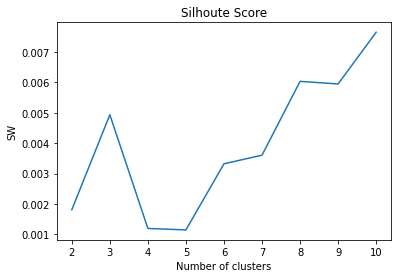

[0.0018068992185259795, 0.004937769890875939, 0.001192199868748065, 0.0011439697283390294, 0.0033218342966447735, 0.003605802777933881, 0.006036976994713939, 0.005950914343921351, 0.007654977719741376]


In [40]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()
print(sw)

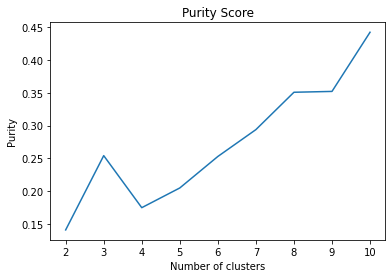

[0.1404746632456703, 0.25400898011545864, 0.17447081462475947, 0.20461834509300833, 0.25272610647851185, 0.2937780628608082, 0.35086593970493907, 0.3521488133418858, 0.44259140474663244]


In [41]:
plt.plot(range(2, 11), purity)
plt.title('Purity Score')
plt.xlabel('Number of clusters')
plt.ylabel('Purity')      #within cluster sum of squares
plt.show()
print(purity)